In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

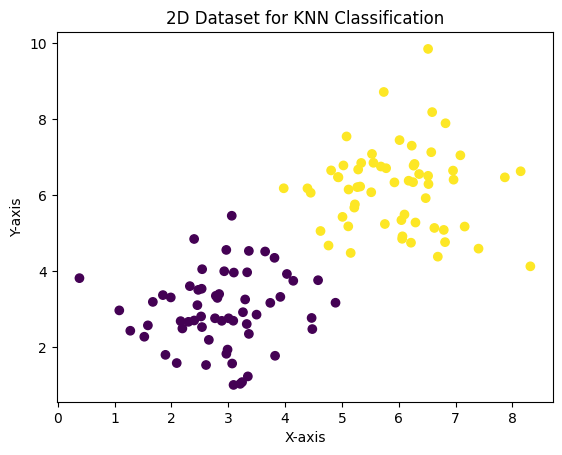

In [351]:
# Set a random seed for reproducibility
np.random.seed(42)

n_points = 60
# Class 1
class1_points = np.random.normal(loc=[3, 3], scale=[1, 1], size=(n_points, 2))

# Class 2
class2_points = np.random.normal(loc=[6, 6], scale=[1, 1], size=(n_points, 2))

# Combine the points from both classes
all_points = np.concatenate([class1_points, class2_points])

# Create labels for the classes (0 for class 1, 1 for class 2)
labels = np.array([-1] * n_points + [1] * n_points)

# Scatter plot to visualize the dataset
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [352]:
scaler = MinMaxScaler(feature_range=(-1,1))
all_points = scaler.fit_transform(all_points)

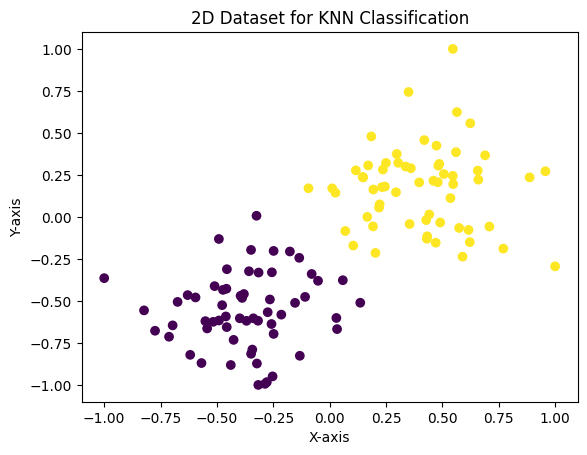

In [353]:
# all_points = all_points - all_points.mean(axis=0)
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

w_1.x + w_2.y = 0 -> y = - w_1.x / w_2

In [354]:
def line(W):
    x_start = -10
    x_end = 10
    return np.array([[x_start, -W[0] * x_start / W[1]], [x_end, -W[0] * x_end / W[1]]])

In [355]:
def plot_classifier(points, W):
    lines = line(W)
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal', adjustable='box')
    ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
    ax.plot(lines[:, 0], lines[:, 1], c='b')
    ax.plot([0, W[0]], [0, W[1]], c='r')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()

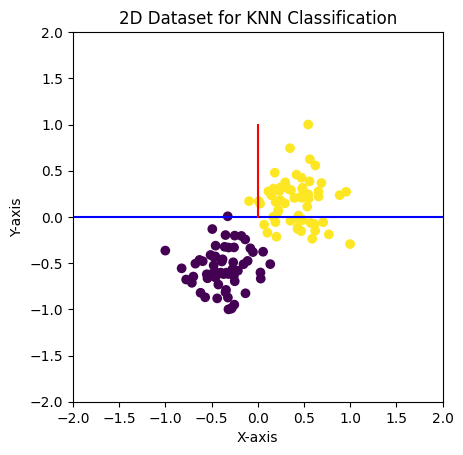

In [486]:
W = np.random.randint(low=-5, high=5, size=2)
W = W / np.linalg.norm([W[0], W[1]])
plot_classifier(all_points, W)

In [487]:
y = labels

In [488]:
def predict(X, W):
    return np.sign(X.dot(W))

In [489]:
first_point = all_points[0, :].reshape(1, 2)
first_point, labels[0]

(array([[-0.21444399, -0.58161951]]), -1)

In [490]:
predict(first_point, W)

array([-1.])

In [491]:
y_pred = predict(all_points, W)
y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,
        1.,  1.,  1.])

In [492]:
y - y_pred

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,
        0.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  2.,
        0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  2.,  0.,  0.,  2.,
        0.,  0.,  0.])

In [493]:
pos = np.where((y - y_pred) != 0)[0]

In [494]:
all_points[pos]

array([[-0.32446711,  0.0069366 ],
       [ 0.61594426, -0.07736586],
       [ 0.77014927, -0.18877918],
       [ 0.62161206, -0.15009571],
       [ 0.1047571 , -0.17036478],
       [ 0.4904252 , -0.03324156],
       [ 0.70859486, -0.05729751],
       [ 0.35469714, -0.04215184],
       [ 0.19233426, -0.05619528],
       [ 0.57426133, -0.06554955],
       [ 0.20310274, -0.21434306],
       [ 0.47051728, -0.15346086],
       [ 0.43122383, -0.13021087],
       [ 0.06928659, -0.08379949],
       [ 1.        , -0.29407292],
       [ 0.58953478, -0.23648453],
       [ 0.43275421, -0.11545446],
       [ 0.4280385 , -0.01904497]])

C:\Users\84866\AppData\Local\Temp\ipykernel_6480\1098728331.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(all_points[pos][:, 0], all_points[pos][:, 1], c='r', cmap='viridis')


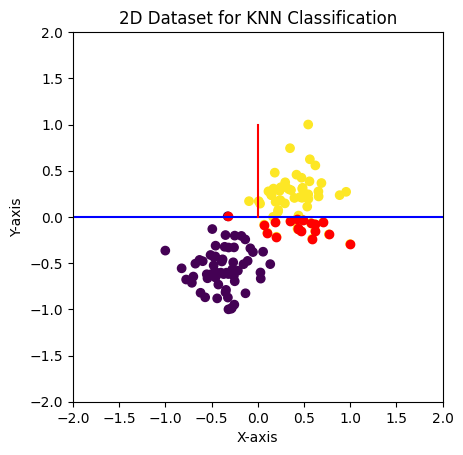

In [495]:
lines = line(W)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
ax.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
ax.scatter(all_points[pos][:, 0], all_points[pos][:, 1], c='r', cmap='viridis')
ax.plot(lines[:, 0], lines[:, 1], c='b')
ax.plot([0, W[0]], [0, W[1]], c='r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

In [496]:
rand_pos = np.random.choice(pos, size = 1)[0]

In [497]:
new_W = W + all_points[rand_pos] * y[rand_pos]


C:\Users\84866\AppData\Local\Temp\ipykernel_6480\2604936784.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(all_points[rand_pos][0], all_points[rand_pos][1], c='r', cmap='viridis')
C:\Users\84866\AppData\Local\Temp\ipykernel_6480\2604936784.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(new_W[0], new_W[1], c='g', cmap='viridis')


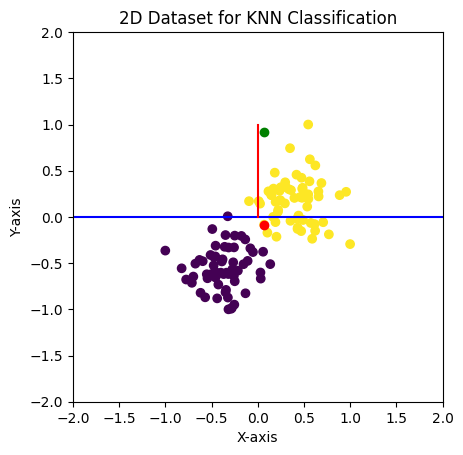

In [498]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
ax.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
ax.scatter(all_points[rand_pos][0], all_points[rand_pos][1], c='r', cmap='viridis')
ax.scatter(new_W[0], new_W[1], c='g', cmap='viridis')
ax.plot(lines[:, 0], lines[:, 1], c='b')
ax.plot([0, W[0]], [0, W[1]], c='r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()